# Imports

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import phonecalls as pc
import asanisi as an
import copy
import os


plt.rcParams['figure.figsize'] = (20, 10)
markers = ['o', 'v', 's', 'P', '*', 'X', 'd', 'x', 'D', '2', '+']

# Getting Data

In [2]:
%time mit_calls = pc.allcalls('../social_signatures/data/FriendsAndFamily/CallLog.csv', (), 'participantID.A', 'number.hash', ['local_time'], "%Y-%m-%d %H:%M:%S", header=True, min_activity=1)
mit_calls.head()

CPU times: user 482 ms, sys: 51.6 ms, total: 533 ms
Wall time: 556 ms


,ego,alter,time,uclock,aclock
0,fa10-01-19,10153fa58c24d1a2eb54b3c6ac39482acb61131c,2010-12-31 16:44:24,307,0
1,fa10-01-22,101b96d65031e2792acd950125d90cf9ff30b5ac,2011-05-23 20:59:05,450,0
2,fa10-01-12,1023b616632f3ba048b2f1d1374788bfa0444a8d,2011-01-22 14:01:07,328,0
3,fa10-01-01,102c517fc9ecf84975448470893c3799f5588c8a,2011-05-27 17:52:56,454,0
4,fa10-01-07,102cd812edb5689302bcc57df8330cff44727bd1,2011-04-04 10:02:50,400,0


In [3]:
%time mit_pairs = pc.pairs(mit_calls)
mit_pairs.head()

CPU times: user 41.2 ms, sys: 647 µs, total: 41.8 ms
Wall time: 41.3 ms


,ego,alter,nij,k,n
0,fa10-01-01,102c517fc9ecf84975448470893c3799f5588c8a,1,516,3339
1,fa10-01-01,abac98a7f6c000a6600c0e9cc370b059a874c3fd,1,516,3339
2,fa10-01-01,b8bc40aefbb724dfbacb3fd296cbb10b2dd35a85,6,516,3339
3,fa10-01-01,b8b0f0fc34d4201df3ebb5ebcefbbb61a3499941,1,516,3339
4,fa10-01-01,b8af4e561030e5a28b441467ede33b9450dd8518,1,516,3339


In [4]:
%time mit_lives = pc.lives_dictionary(mit_calls)
# just to show how an entry looks like
mit_lives['fa10-01-01']['102c517fc9ecf84975448470893c3799f5588c8a']

CPU times: user 10.1 s, sys: 8.42 ms, total: 10.1 s
Wall time: 10.1 s


{'t0': 454, 'tf': 454, 'ell': 0, 'nij': 1}

In [5]:
%time mit_calls = pc.remove_alters(mit_calls, mit_lives, 210) # only keep alters and phone calls appeared after 7 months, counting from the start of the data
mit_calls.head()

/home/vsvh/docs/GMU/research/models/phonecalls.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['uclock'] -= num_days


CPU times: user 2.2 s, sys: 35.9 ms, total: 2.23 s
Wall time: 2.23 s


,ego,alter,time,uclock,aclock
0,fa10-01-19,10153fa58c24d1a2eb54b3c6ac39482acb61131c,2010-12-31 16:44:24,97,0
1,fa10-01-22,101b96d65031e2792acd950125d90cf9ff30b5ac,2011-05-23 20:59:05,240,0
2,fa10-01-12,1023b616632f3ba048b2f1d1374788bfa0444a8d,2011-01-22 14:01:07,118,0
3,fa10-01-01,102c517fc9ecf84975448470893c3799f5588c8a,2011-05-27 17:52:56,244,0
4,fa10-01-07,102cd812edb5689302bcc57df8330cff44727bd1,2011-04-04 10:02:50,190,0


In [6]:
%time mit_pairs = pc.pairs(mit_calls)
%time mit_lives = pc.lives_dictionary(mit_calls)

CPU times: user 25.6 ms, sys: 2.77 ms, total: 28.4 ms
Wall time: 27.7 ms
CPU times: user 8.26 s, sys: 1.51 ms, total: 8.26 s
Wall time: 8.27 s


# Get $F$

This is a required step to obtain $b$

In [7]:
%time fall = pc.get_f(mit_calls, 'all', mit_lives, 180, 60)

CPU times: user 54 s, sys: 80.6 ms, total: 54.1 s
Wall time: 54.1 s


# From $F$ to $b$

In [8]:
%time blamb = an.get_b(fall, 'lambda')
%time blambplot = an.plot_g(blamb, mit_lives, 'lambda', 60)

CPU times: user 1.6 s, sys: 19.9 ms, total: 1.62 s
Wall time: 1.62 s
CPU times: user 18.1 ms, sys: 3.3 ms, total: 21.4 ms
Wall time: 20.3 ms


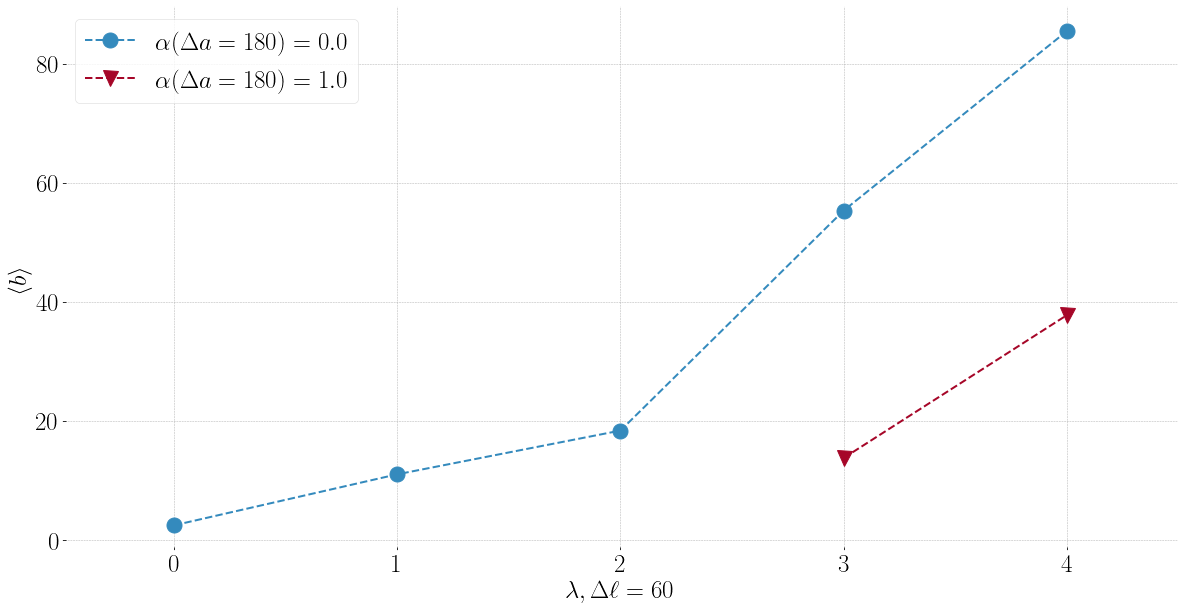

In [9]:
plt.xlabel(r"$\lambda, \Delta \ell = 60$")
plt.ylabel(r"$\langle b \rangle$")
plt.xlim(-0.5, 4.5)
plt.xticks(range(5))
for a in blambplot.keys():
    plt.plot(blambplot[a].index, blambplot[a]['lambda'], marker=markers[int(a)], markersize=15, linestyle="--", label=fr"$\alpha(\Delta a  = 180) = {a}$")
plt.legend()

In [10]:
%time fall2 = pc.get_f(mit_calls, 'all', mit_lives, 60, 180)
%time bal = an.get_b(fall2, 'alpha')
%time balplot = an.plot_g(bal, mit_lives, 'alpha', 180)

CPU times: user 54.9 s, sys: 74 ms, total: 55 s
Wall time: 55 s
CPU times: user 1.49 s, sys: 23.4 ms, total: 1.51 s
Wall time: 1.51 s
CPU times: user 20.6 ms, sys: 0 ns, total: 20.6 ms
Wall time: 20.5 ms


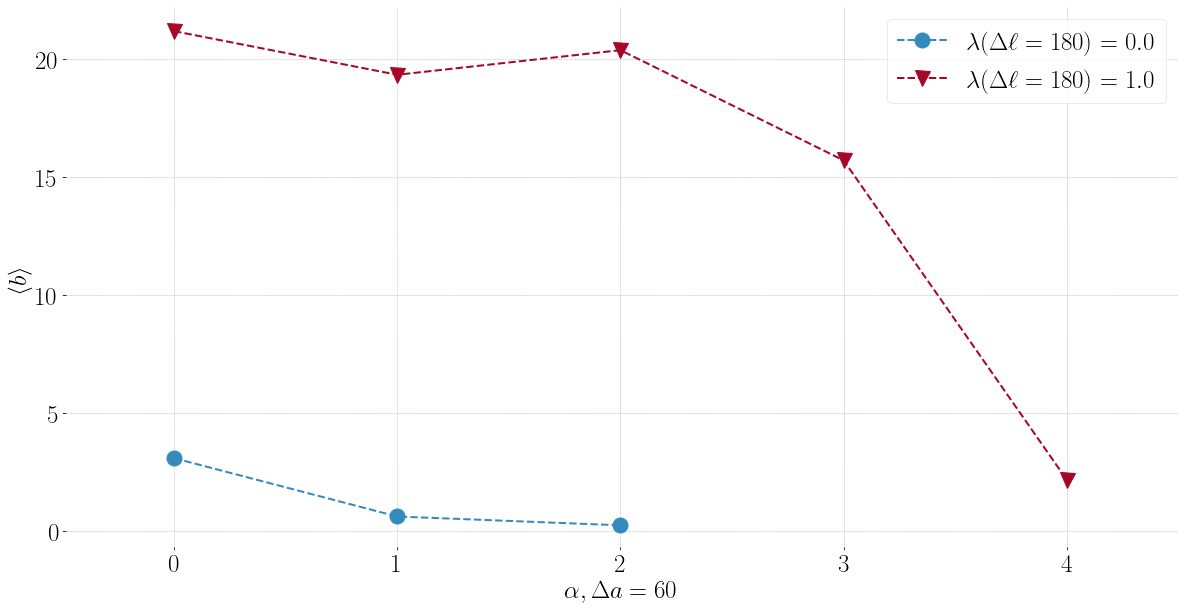

In [11]:
plt.xlabel(r"$\alpha, \Delta a = 60$")
plt.ylabel(r"$\langle b \rangle$")
plt.xlim(-0.5, 4.5)
plt.xticks(range(5))
for a in balplot.keys():
    plt.plot(balplot[a].index, balplot[a]['alpha'], marker=markers[int(a)], markersize=15, linestyle="--", label=fr"$\lambda(\Delta \ell  = 180) = {a}$")
plt.legend()

In [12]:
egolist = list(mit_calls['ego'].unique())

In [13]:
#%time fall2 = pc.get_f(mit_calls, egolist[0], mit_lives, 60, 180)

CPU times: user 702 ms, sys: 66 µs, total: 702 ms
Wall time: 697 ms


In [14]:
pd.set_option('mode.chained_assignment', None)

In [26]:
%time fall = pc.get_f(mit_calls, 'all', mit_lives, 60, 7)

CPU times: user 53.5 s, sys: 96.7 ms, total: 53.6 s
Wall time: 53.5 s


In [27]:
%time blamb = an.get_b(fall, 'lambda')

CPU times: user 2.97 s, sys: 0 ns, total: 2.97 s
Wall time: 2.96 s


In [29]:
blamb[egolist[0]]

,lambda,alpha,g
0,0.0,0.0,1.529412
1,1.0,0.0,4.000000
2,2.0,0.0,4.500000
3,3.0,0.0,7.000000
4,5.0,0.0,2.000000
...,...,...,...
69,36.0,0.0,40.000000
70,36.0,1.0,77.000000
71,36.0,2.0,26.000000
72,36.0,3.0,52.000000


In [31]:
allb = []
for ego in blamb.keys():
    df = blamb[ego].loc[blamb[ego]['alpha'] == 1]
    for i in df.index:
        allb.append(df.at[i, 'g'])
        
[max(allb), min(allb), len(allb)]

[360.0, 0.25, 1182]

(array([651., 234.,  89.,  42.,  36.,  17.,  14.,  11.,  12.,   3.,   9.,
          6.,   4.,   4.,   3.,   0.,   7.,   1.,   2.,   2.,   0.,   3.,
          2.,   2.,   0.,   0.,   0.,   0.,   1.,   3.,   1.,   2.,   1.,
          2.,   1.,   0.,   1.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,
          1.,   0.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.500000e-01, 3.847500e+00, 7.445000e+00, 1.104250e+01,
        1.464000e+01, 1.823750e+01, 2.183500e+01, 2.543250e+01,
        2.903000e+01, 3.262750e+01, 3.622500e+01, 3.982250e+01,
        4.342000e+01, 4.701750e+01, 5.061500e+01, 5.421250e+01,
        5.781000e+01, 6.140750e+01, 6.500500e+01, 6.860250e+01

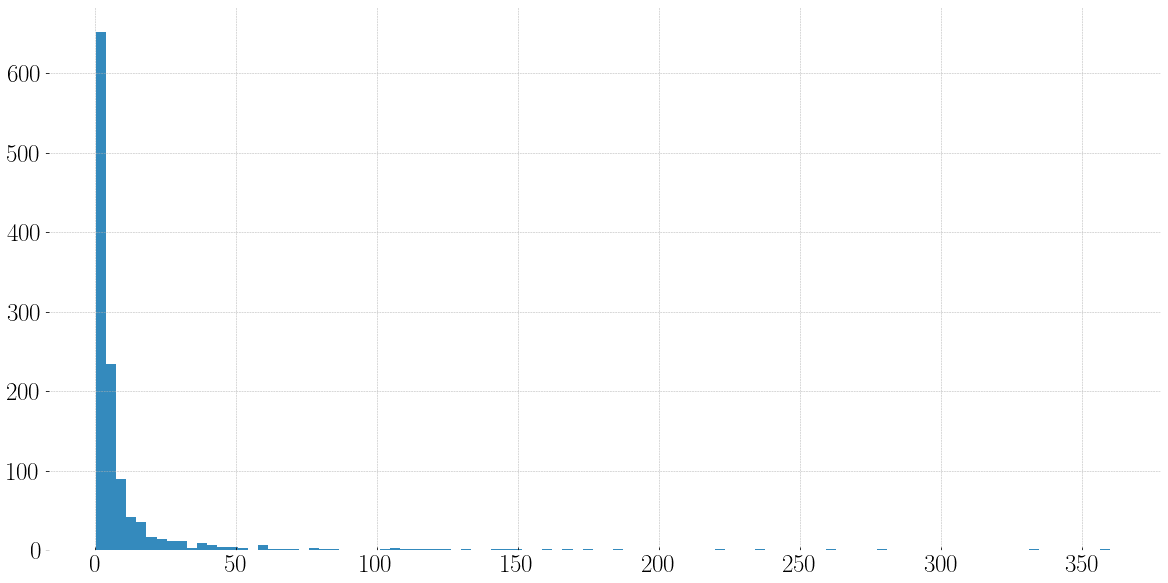

In [34]:
plt.hist(allb, bins = 100)

In [53]:
test = {}
for i in range(4):
    test[i] = {}
    
for ego in blamb.keys():
    df = blamb[ego].loc[blamb[ego]['alpha'] == 1]
    for i in df.index:
        lamb = df.at[i, 'lambda']
        b = df.at[i, 'g']
        test[3][lamb] = test[3].get(lamb, 0) + 1
        if b < 17:
            test[0][lamb] = test[0].get(lamb, 0) + 1
        elif (b >= 17) and (b < 34):
            test[1][lamb] = test[1].get(lamb, 0) + 1
        else:
            test[2][lamb] = test[2].get(lamb, 0) + 1

for i in test.keys():
    test[i] = pd.DataFrame.from_dict(test[i], orient='index')
    test[i].sort_index(inplace=True)

In [60]:
sum(test[0][0] / sum(test[0][0]))

0.9999999999999999

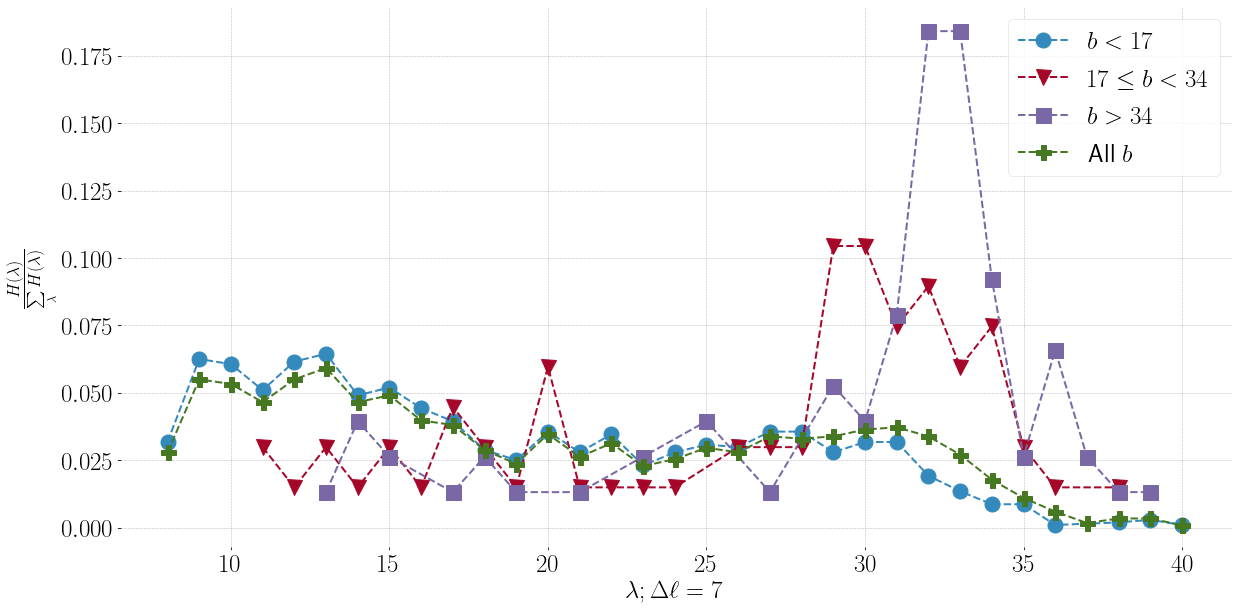

In [71]:
legends = [r"$b < 17$", r"$17 \leq b < 34$", r"$b > 34$", r"All $b$"]
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in test.keys():
    plt.plot(test[i].index, test[i][0] / sum(test[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()